In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import datetime
import os

In [2]:
#Seven-Day Load Forecast by Weather Zone URL
url = 'http://mis.ercot.com/misapp/GetReports.do?reportTypeId=12312&reportTitle=Seven-Day%20Load%20Forecast%20by%20Weather%20Zone&showHTMLView=&mimicKey'

In [3]:
response = requests.get(url)

In [4]:
soup = bs(response.text, 'html.parser')

In [5]:
title_results = soup.find_all('td', class_='labelOptional_ind')

In [8]:
url_results = soup.find_all('td', class_='labelOptional', text=True)
print(url_results)

[<td class="labelOptional" width="15%"><div align="center"> </div></td>, <td class="labelOptional" width="15%"><div align="center"> </div></td>, <td class="labelOptional" width="15%"><div align="center"><a href="/misdownload/servlets/mirDownload?mimic_duns=000000000&amp;doclookupId=726348287">zip</a></div></td>, <td class="labelOptional" width="15%"><div align="center"> </div></td>, <td class="labelOptional" width="15%"><div align="center"> </div></td>, <td class="labelOptional" width="15%"><div align="center"><a href="/misdownload/servlets/mirDownload?mimic_duns=000000000&amp;doclookupId=726348286">zip</a></div></td>, <td class="labelOptional" width="15%"><div align="center"> </div></td>, <td class="labelOptional" width="15%"><div align="center"> </div></td>, <td class="labelOptional" width="15%"><div align="center"><a href="/misdownload/servlets/mirDownload?mimic_duns=000000000&amp;doclookupId=726342520">zip</a></div></td>, <td class="labelOptional" width="15%"><div align="center"> <

In [10]:
url_results[0]

<td class="labelOptional" width="15%"><div align="center"> </div></td>

In [15]:
base_url = 'http://mis.ercot.com'

data_urls = []

for result in url_results:
    try:
        end_url = result.find('div').a['href']
        full_url = base_url + end_url
        data_urls.append(full_url)
        print(full_url)
    except:
        pass

http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726348287
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726348286
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726342520
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726342517
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726336722
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726336721
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726330782
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726330780
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726324689
http://mis.ercot.com/misdownload/servlets/mirDownload?mimic_duns=000000000&doclookupId=726324688
http://mis.ercot.com/misdownlo

## Extract Zip File from URL

In [16]:
data = requests.get(data_urls[0], stream=True)

In [17]:
type(data)

requests.models.Response

In [115]:
import requests, zipfile, io

In [116]:
z = zipfile.ZipFile(io.BytesIO(data.content))

In [117]:
z.extractall()

In [118]:
file = z.namelist()[0]

In [119]:
#load zip file to df
load_fcst = pd.read_csv(file)

#delete zip file after reading
os.remove(file)

In [120]:
load_fcst

,DeliveryDate,HourEnding,Coast,East,FarWest,North,NorthCentral,SouthCentral,Southern,West,SystemTotal,DSTFlag
0,07/27/2020,1:00,11542.7998,1441.3400,3808.0801,1029.590,13911.5000,6965.7700,3087.3501,1378.5601,43164.9901,N
1,07/27/2020,2:00,11082.9004,1439.2100,3752.3101,953.336,13103.5996,6519.7202,2961.8701,1296.6200,41109.5664,N
2,07/27/2020,3:00,10774.7998,1354.0500,3680.9700,937.441,12433.2002,6291.2798,2952.5400,1369.9000,39794.1808,N
3,07/27/2020,4:00,10524.2002,1372.2900,3634.4199,888.142,11980.0000,6238.2700,2862.9199,1251.0100,38751.2520,N
4,07/27/2020,5:00,10677.7998,1355.6200,3626.4900,853.798,11994.7998,6181.1001,2840.5801,1172.7700,38702.9578,N
...,...,...,...,...,...,...,...,...,...,...,...,...
187,08/03/2020,20:00,17020.5000,2246.1699,4405.9102,1362.000,20892.8008,11710.2002,5159.1899,2060.5701,64857.3411,N
188,08/03/2020,21:00,16954.0996,2121.5701,4379.1201,1297.220,19977.5996,11193.7998,5012.4800,2008.5500,62944.4392,N
189,08/03/2020,22:00,16351.5996,2109.6001,4337.6699,1215.460,19134.1992,10624.5000,4941.7402,1987.8300,60702.5990,N
190,08/03/2020,23:00,15505.7002,1953.3000,4198.7900,1129.910,17564.6992,9866.7100,4673.0801,1876.9800,56769.1695,N


In [130]:
#clean existing columns
load_fcst['DeliveryDate'] = pd.to_datetime(load_fcst.DeliveryDate).dt.normalize()
load_fcst['HourEnding'] = load_fcst.HourEnding.str.split(':').str[0]

#add file name and process info to df
load_fcst['file_name'] = z.namelist()[0]
load_fcst['process_date'] = pd.to_datetime(load_fcst.file_name.str.split('.').str[3]).dt.normalize()
load_fcst['process_hour'] = load_fcst.file_name.str.split('.').str[4]
load_fcst['process_dt'] = pd.to_datetime(load_fcst.file_name.str.split('.').str[3] + load_fcst.file_name.str.split('.').str[4])
load_fcst['process_hour'] = load_fcst.process_hour.str[0:2]

load_fcst.HourEnding = load_fcst.HourEnding.astype(str)

#add delivery date time
load_fcst['delivery_dt'] = pd.to_datetime(load_fcst.DeliveryDate) + load_fcst.HourEnding.astype('timedelta64[h]')

#add weekday columns
load_fcst['weekday'] = load_fcst.delivery_dt.dt.day_name().str.upper()


In [131]:
load_fcst.head()

,DeliveryDate,HourEnding,Coast,East,FarWest,North,NorthCentral,SouthCentral,Southern,West,SystemTotal,DSTFlag,file_name,process_date,process_hour,process_dt,delivery_dt,weekday
0,2020-07-27,1,11542.7998,1441.34,3808.0801,1029.590,13911.5000,6965.7700,3087.3501,1378.5601,43164.9901,N,cdr.00012312.0000000000000000.20200727.203000....,2020-07-27,20,2020-07-27 20:30:00,2020-07-27 01:00:00,MONDAY
1,2020-07-27,2,11082.9004,1439.21,3752.3101,953.336,13103.5996,6519.7202,2961.8701,1296.6200,41109.5664,N,cdr.00012312.0000000000000000.20200727.203000....,2020-07-27,20,2020-07-27 20:30:00,2020-07-27 02:00:00,MONDAY
2,2020-07-27,3,10774.7998,1354.05,3680.9700,937.441,12433.2002,6291.2798,2952.5400,1369.9000,39794.1808,N,cdr.00012312.0000000000000000.20200727.203000....,2020-07-27,20,2020-07-27 20:30:00,2020-07-27 03:00:00,MONDAY
3,2020-07-27,4,10524.2002,1372.29,3634.4199,888.142,11980.0000,6238.2700,2862.9199,1251.0100,38751.2520,N,cdr.00012312.0000000000000000.20200727.203000....,2020-07-27,20,2020-07-27 20:30:00,2020-07-27 04:00:00,MONDAY
4,2020-07-27,5,10677.7998,1355.62,3626.4900,853.798,11994.7998,6181.1001,2840.5801,1172.7700,38702.9578,N,cdr.00012312.0000000000000000.20200727.203000....,2020-07-27,20,2020-07-27 20:30:00,2020-07-27 05:00:00,MONDAY


In [132]:
load_fcst.describe()

,Coast,East,FarWest,North,NorthCentral,SouthCentral,Southern,West,SystemTotal
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,14854.105617,1973.881322,4007.799396,1151.526010,17149.112483,8965.135973,4070.627562,1681.373491,53853.561855
std,2395.176315,370.535451,229.961244,225.461013,3418.167467,1794.184756,739.878106,258.478043,9278.050124
min,10524.200200,1354.050000,3626.050000,784.217000,11494.900400,6181.100100,2840.580100,1172.770000,38702.957800
25%,12585.525150,1621.775000,3786.567575,941.707500,13904.625000,7235.265025,3403.950050,1458.964925,44895.824575
50%,14953.699700,1994.394950,4000.445050,1145.928500,17044.850600,8961.459950,4086.535000,1653.365050,53818.730050
75%,16899.457050,2305.845950,4225.785525,1355.160000,20298.702125,10584.375250,4638.182625,1908.559925,62282.631575
max,18945.800800,2603.560100,4452.569800,1581.189900,23599.699200,12272.500000,5663.180200,2121.510000,69818.979900


In [133]:
load_fcst.dtypes

DeliveryDate    datetime64[ns]
HourEnding              object
Coast                  float64
East                   float64
FarWest                float64
North                  float64
NorthCentral           float64
SouthCentral           float64
Southern               float64
West                   float64
SystemTotal            float64
DSTFlag                 object
file_name               object
process_date    datetime64[ns]
process_hour            object
process_dt      datetime64[ns]
delivery_dt     datetime64[ns]
weekday                 object
dtype: object

In [134]:
z.namelist()[0]

'cdr.00012312.0000000000000000.20200727.203000.LFCWEATHERNP3561.csv'

### Convert DF to Long Format (i.e. Unpivot Forecast columns)

In [135]:
#use pd.melt to unpivot columns
long_load_fcst = pd.melt(load_fcst, id_vars=['DeliveryDate', 'weekday', 'HourEnding', 'DSTFlag', 'file_name', 'process_date', 'process_hour', 'process_dt', 'delivery_dt'],var_name='weather_zone', value_name ='mw')

#rename columns
long_load_fcst = long_load_fcst.rename(columns={'DeliveryDate':'delivery_date','HourEnding':'delivery_hour','DSTFlag':'dst_flag'})

#reorganize columns
arranged_columns = ['delivery_dt', 'delivery_date', 'delivery_hour','dst_flag', 'weekday', 'weather_zone', 'mw', 'process_date', 'process_hour', 'process_dt', 'file_name']


long_load_fcst = long_load_fcst[arranged_columns]
long_load_fcst

,delivery_dt,delivery_date,delivery_hour,dst_flag,weekday,weather_zone,mw,process_date,process_hour,process_dt,file_name
0,2020-07-27 01:00:00,2020-07-27,1,N,MONDAY,Coast,11542.7998,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1,2020-07-27 02:00:00,2020-07-27,2,N,MONDAY,Coast,11082.9004,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
2,2020-07-27 03:00:00,2020-07-27,3,N,MONDAY,Coast,10774.7998,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
3,2020-07-27 04:00:00,2020-07-27,4,N,MONDAY,Coast,10524.2002,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
4,2020-07-27 05:00:00,2020-07-27,5,N,MONDAY,Coast,10677.7998,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
...,...,...,...,...,...,...,...,...,...,...,...
1723,2020-08-03 20:00:00,2020-08-03,20,N,MONDAY,SystemTotal,64857.3411,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1724,2020-08-03 21:00:00,2020-08-03,21,N,MONDAY,SystemTotal,62944.4392,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1725,2020-08-03 22:00:00,2020-08-03,22,N,MONDAY,SystemTotal,60702.5990,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1726,2020-08-03 23:00:00,2020-08-03,23,N,MONDAY,SystemTotal,56769.1695,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....


## Plotting Forecasts

In [136]:
import plotly.express as px
#import plotly.io as pio
#pio.renderers.default = "svg"

In [139]:
system_df = long_load_fcst.loc[long_load_fcst.weather_zone == 'SystemTotal', :] 

system_df.head()

systemFig = px.line(system_df, x="delivery_dt", y="mw", title='System Level Forecasts')

systemFig.show('svg')

In [140]:
wz_df = long_load_fcst.loc[long_load_fcst.weather_zone != 'SystemTotal', :] 

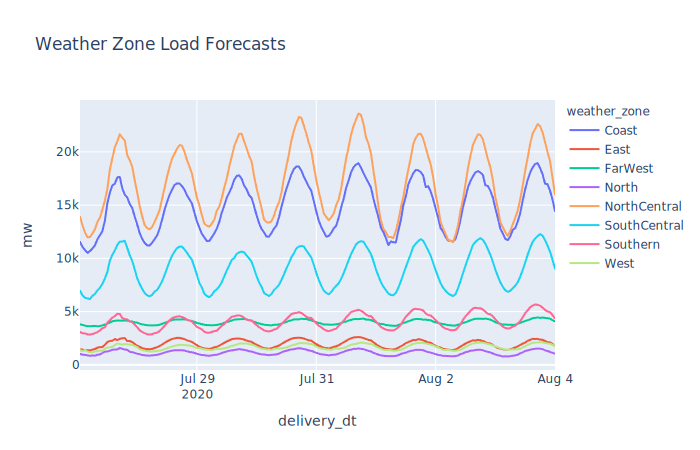

In [141]:
wzFig = px.line(wz_df, x='delivery_dt', y='mw', color='weather_zone', title='Weather Zone Load Forecasts')
wzFig.show('svg')

## Load Data to PostgreSQL Database

In [142]:
from sqlalchemy import create_engine

In [143]:
connection_string = f"postgres:trumpet5@localhost:5432/ercot_db"
engine = create_engine(f'postgresql://{connection_string}')

In [144]:
#fill table
long_load_fcst.to_sql(name='da_load_fcst', con=engine, if_exists='append', index=False)

In [145]:
#Print Table
pd.read_sql_query('select * from da_load_fcst', con=engine)

,delivery_dt,delivery_date,delivery_hour,dst_flag,weekday,weather_zone,mw,process_date,process_hour,process_dt,file_name
0,2020-07-27 01:00:00,2020-07-27,1,N,MONDAY,Coast,11542.7998,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1,2020-07-27 02:00:00,2020-07-27,2,N,MONDAY,Coast,11082.9004,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
2,2020-07-27 03:00:00,2020-07-27,3,N,MONDAY,Coast,10774.7998,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
3,2020-07-27 04:00:00,2020-07-27,4,N,MONDAY,Coast,10524.2002,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
4,2020-07-27 05:00:00,2020-07-27,5,N,MONDAY,Coast,10677.7998,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
...,...,...,...,...,...,...,...,...,...,...,...
1723,2020-08-03 20:00:00,2020-08-03,20,N,MONDAY,SystemTotal,64857.3411,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1724,2020-08-03 21:00:00,2020-08-03,21,N,MONDAY,SystemTotal,62944.4392,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1725,2020-08-03 22:00:00,2020-08-03,22,N,MONDAY,SystemTotal,60702.5990,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
1726,2020-08-03 23:00:00,2020-08-03,23,N,MONDAY,SystemTotal,56769.1695,2020-07-27,20,2020-07-27 20:30:00,cdr.00012312.0000000000000000.20200727.203000....
